In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
names = ['w_freq_make', 'w_freq_adress', 'w_freq_all', 'w_freq_3d', 'w_freq_our', 'w_freq_over', 'w_freq_remove',
         'w_freq_internet', 'w_freq_order', 'w_freq_mail', 'w_freq_receive', 'w_freq_will', 'w_freq_people',
         'w_freq_report', 'w_freq_adresses', 'w_freq_free', 'w_freq_business', 'w_freq_email', 'w_freq_you', 'w_freq_credit',
         'w_freq_your', 'w_freq_font', 'w_freq_000', 'w_freq_money', 'w_freq_hp', 'w_freq_hpl', 'w_freq_george', 'w_freq_650',
         'w_freq_lab', 'w_freq_labs', 'w_freq_telnet', 'w_freq_857', 'w_freq_data', 'w_freq_415', 'w_freq_85',
         'w_freq_technology', 'w_freq_1999', 'w_freq_parts', 'w_freq_pm', 'w_freq_direct', 'w_freq_cs', 'w_freq_meeting',
         'w_freq_original', 'w_freq_project', 'w_freq_re', 'w_freq_edu', 'w_freq_table', 'w_freq_conference',
         'c_freq_;', 'c_freq_(', 'c_freq_[', 'c_freq_!', 'c_freq_$', 'c_freq_#',
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'Is_Spam']
# We name the 58 columns of our dataset

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=names)

In [4]:
df

,w_freq_make,w_freq_adress,w_freq_all,w_freq_3d,w_freq_our,w_freq_over,w_freq_remove,w_freq_internet,w_freq_order,w_freq_mail,...,c_freq_;,c_freq_(,c_freq_[,c_freq_!,c_freq_$,c_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Is_Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
df.describe()
# We can see that in our dataset, 39.4% of instances are spam, and we have 4601 instances

,w_freq_make,w_freq_adress,w_freq_all,w_freq_3d,w_freq_our,w_freq_over,w_freq_remove,w_freq_internet,w_freq_order,w_freq_mail,...,c_freq_;,c_freq_(,c_freq_[,c_freq_!,c_freq_$,c_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Is_Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [15]:
print(df.corr())

                            w_freq_make  w_freq_adress  w_freq_all  w_freq_3d  \
w_freq_make                    1.000000      -0.016759    0.065627   0.013273   
w_freq_adress                 -0.016759       1.000000   -0.033526  -0.006923   
w_freq_all                     0.065627      -0.033526    1.000000  -0.020246   
w_freq_3d                      0.013273      -0.006923   -0.020246   1.000000   
w_freq_our                     0.023119      -0.023760    0.077734   0.003238   
w_freq_over                    0.059674      -0.024840    0.087564  -0.010014   
w_freq_remove                  0.007669       0.003918    0.036677   0.019784   
w_freq_internet               -0.003950      -0.016280    0.012003   0.010268   
w_freq_order                   0.106263      -0.003826    0.093786  -0.002454   
w_freq_mail                    0.041198       0.032962    0.032075  -0.004947   
w_freq_receive                 0.188459      -0.006864    0.048254  -0.012976   
w_freq_will                 

To visualize this dataset, we are going to compare the data by categories : the ones who comes from a spam and the ones who don't come from a spam

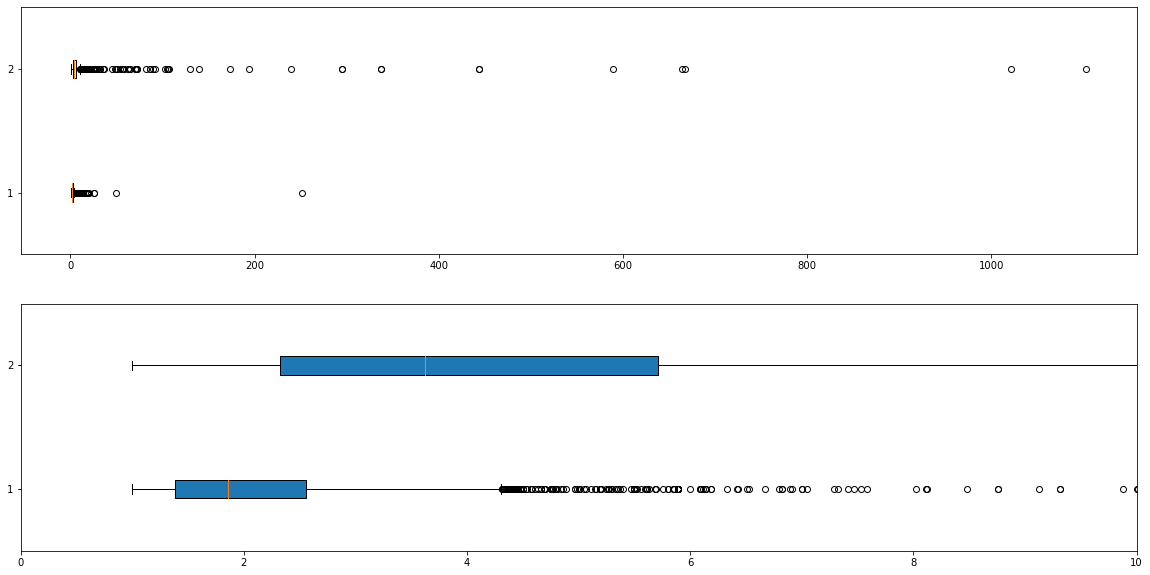

In [60]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(20,10)
data = [df[df['Is_Spam']==0].capital_run_length_average, df[df['Is_Spam']==1].capital_run_length_average]
axes[0].boxplot(data, vert=0)
axes[1].boxplot(data, vert=0, patch_artist=True)
axes[1].set_xlim(xmin=0.0, xmax=10)
plt.show()

These two figures are the boxplot of the average length of capital letters sequences. The second boxplot is the same than the first one but with a 100 time zoom. 
We can se through these boxplots, than there is a lot of aberrant data in this dataset. We can also suppose that if the average length sequence of capital letters is big, there is more chances for the mail to be a spam. 

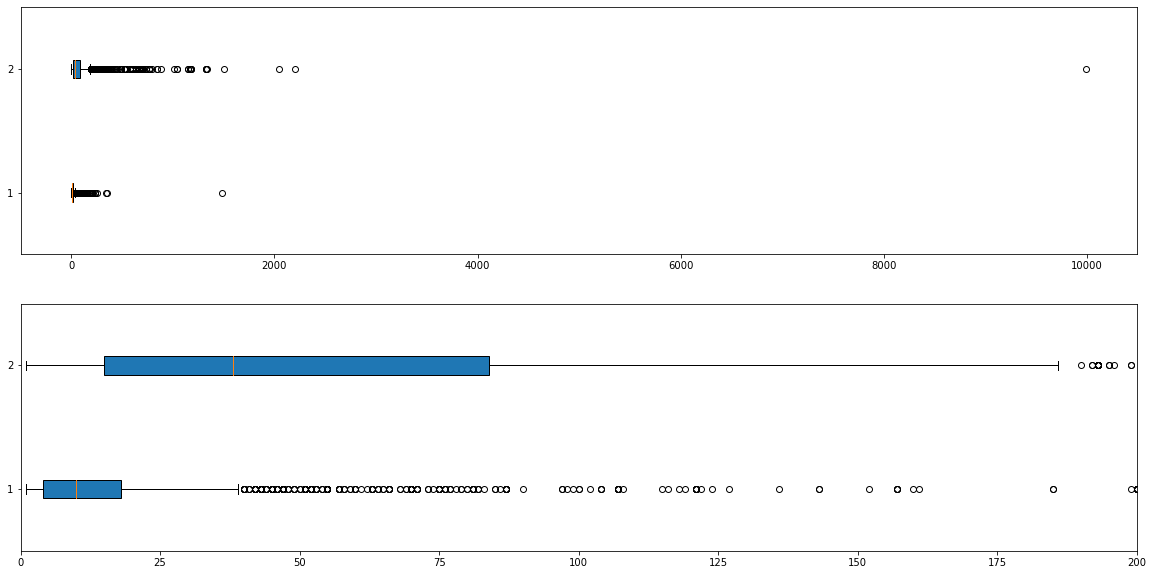

In [69]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(20,10)
data = [df[df['Is_Spam']==0].capital_run_length_longest, df[df['Is_Spam']==1].capital_run_length_longest]
axes[0].boxplot(data, vert=0, patch_artist=True)
axes[1].boxplot(data, vert=0, patch_artist=True)
axes[1].set_xlim(xmin=0.0, xmax=200)
plt.show()

These two figures are the boxplot of the longuest sequence of capital letters. The second boxplot is the same than the first one but with a 50 time zoom. We can se through these boxplots, than there is a lot of aberrant data in this dataset. We can also suppose that if the longuest sequence of capital letters is very big, there is more chances for the mail to be a spam.

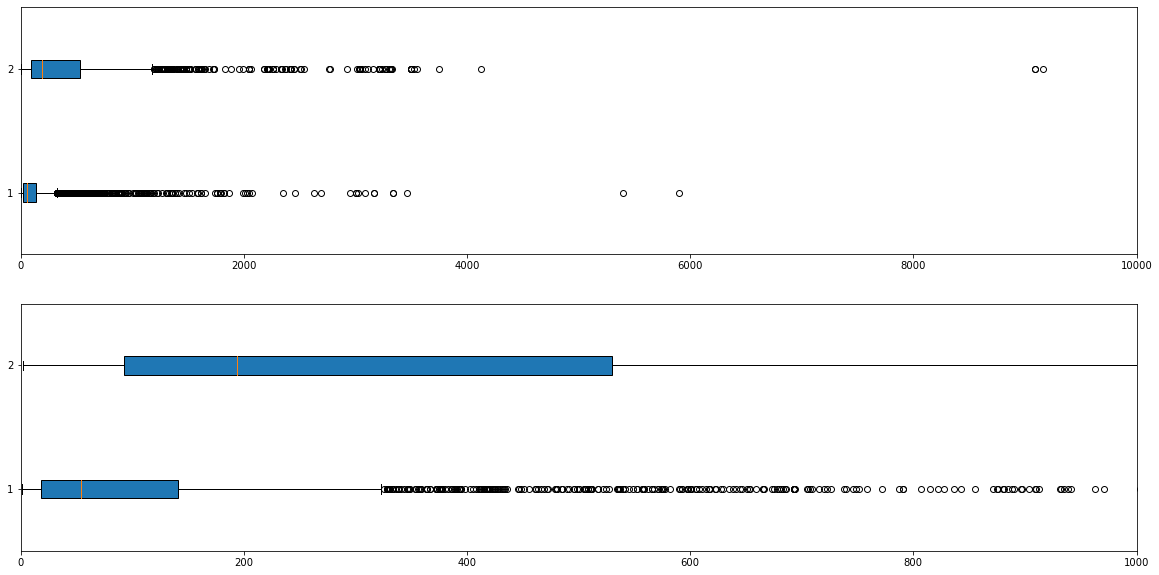

In [73]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(20,10)
data = [df[df['Is_Spam']==0].capital_run_length_total, df[df['Is_Spam']==1].capital_run_length_total]
axes[0].boxplot(data, vert=0, patch_artist=True)
axes[1].boxplot(data, vert=0, patch_artist=True)
axes[1].set_xlim(xmin=0.0, xmax=1000)
axes[0].set_xlim(xmin=0.0, xmax=10000)
plt.show()

These two figures are the boxplot of the sum of capital letters in a mail. The second boxplot is the same than the first one but with a 10 time zoom. We can se through these boxplots, than there is a lot of aberrant data in this dataset. We can also suppose that if the sum of capital letters is very big, there is more chances for the mail to be a spam.

<AxesSubplot:xlabel='Is_Spam', ylabel='capital_run_length_total'>

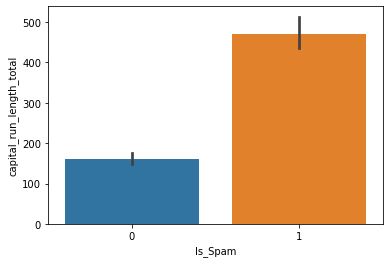

In [116]:
sns.barplot(data=df, x=df['Is_Spam'], y=df.capital_run_length_total)

<AxesSubplot:xlabel='Is_Spam', ylabel='capital_run_length_average'>

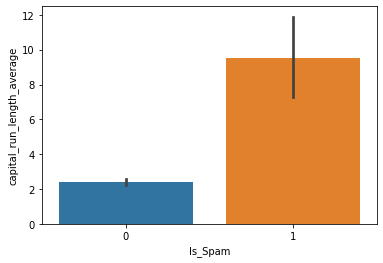

In [112]:
sns.barplot(data=df, x=df['Is_Spam'], y=df.capital_run_length_average)

<AxesSubplot:xlabel='Is_Spam', ylabel='capital_run_length_longest'>

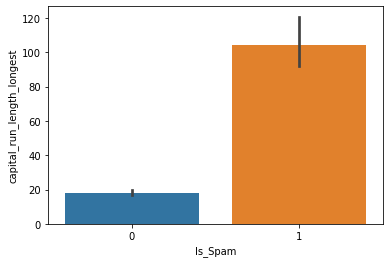

In [110]:
sns.barplot(data=df, x=df['Is_Spam'], y=df.capital_run_length_longest)

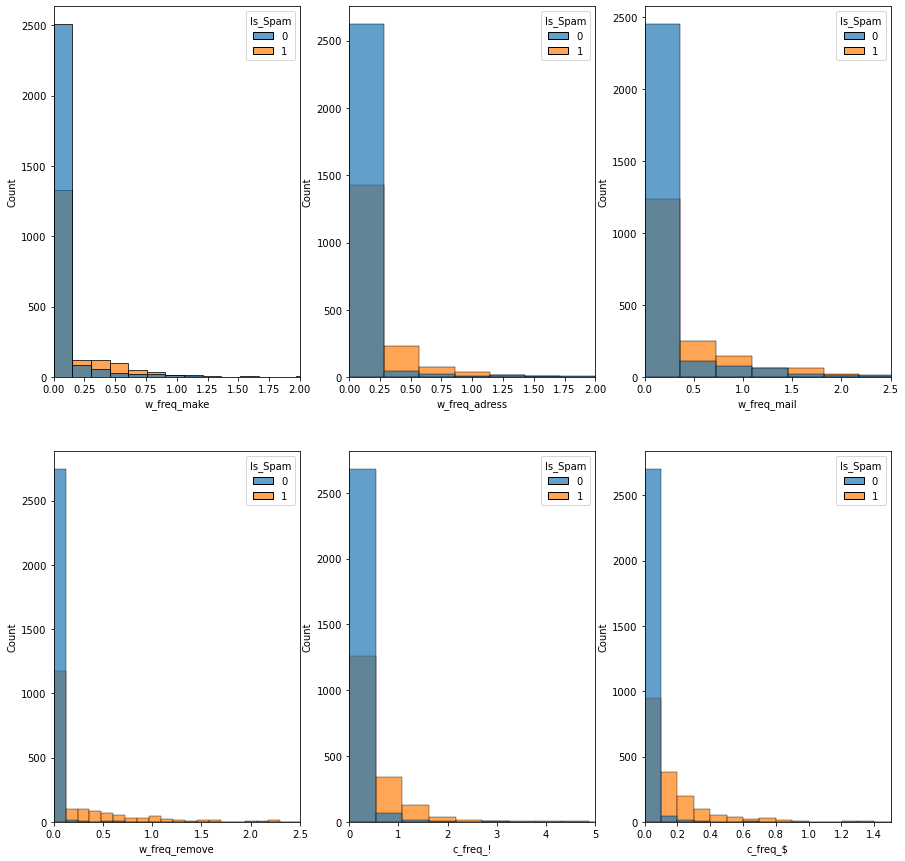

In [57]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(15,15)

sns.histplot(data = df, x='w_freq_make', hue = 'Is_Spam', alpha=0.7, ax = axes[0,0], bins = 30)
axes[0,0].set_xlim(xmin=0.0, xmax=2)

sns.histplot(data = df, x='w_freq_adress', hue = 'Is_Spam', alpha=0.7, ax = axes[0,1], bins = 50)
axes[0,1].set_xlim(xmin=0.0, xmax=2)

sns.histplot(data = df, x='w_freq_mail', hue = 'Is_Spam', alpha=0.7, ax = axes[0,2], bins = 50)
axes[0,2].set_xlim(xmin=0.0, xmax=2.5)

sns.histplot(data = df, x='w_freq_remove', hue = 'Is_Spam', alpha=0.7, ax = axes[1,0], bins = 60)
axes[1,0].set_xlim(xmin=0.0, xmax=2.5)

sns.histplot(data = df, x='c_freq_!', hue = 'Is_Spam', alpha=0.7, ax = axes[1,1], bins = 60)
axes[1,1].set_xlim(xmin=0.0, xmax=5)

sns.histplot(data = df, x='c_freq_$', hue = 'Is_Spam', alpha=0.7, ax = axes[1,2], bins = 60)
axes[1,2].set_xlim(xmin=0.0, xmax=1.5)

plt.show()

These graphs can show us than usually in spams, the frequency of some words or some characters is greater than in non-spam mails.

In [54]:
df2 = pd.DataFrame(df.groupby('Is_Spam').mean())
df2
# dataFrame des moyennes de chaque colonne selon si le mail est un spam ou non

,w_freq_make,w_freq_adress,w_freq_all,w_freq_3d,w_freq_our,w_freq_over,w_freq_remove,w_freq_internet,w_freq_order,w_freq_mail,...,w_freq_conference,c_freq_;,c_freq_(,c_freq_[,c_freq_!,c_freq_$,c_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
Is_Spam,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


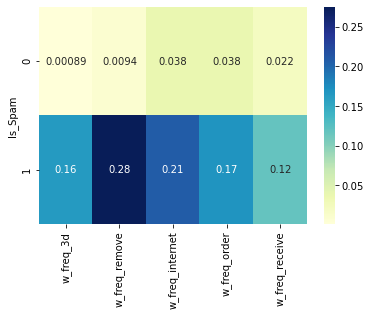

In [79]:
col = ['w_freq_3d', 'w_freq_remove', 'w_freq_internet', 'w_freq_order' , 'w_freq_receive']
sns.heatmap(df2[col], annot=True, cmap="YlGnBu")
plt.show()

We can see on this heatmap that some words seems to appear at a frequencie 2 time greater in spams than in non-spams.

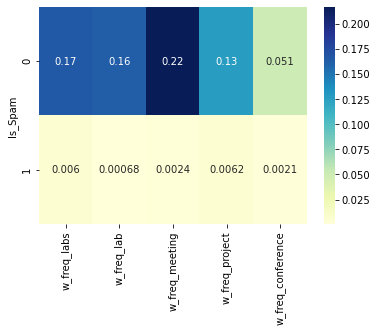

In [78]:
col2 = ['w_freq_labs', 'w_freq_lab', 'w_freq_meeting', 'w_freq_project', 'w_freq_conference']
sns.heatmap(df2[col2], annot=True, cmap="YlGnBu")
plt.show()

We can also see here that there are other words that seems to be more commun in non-spam mails. It seems normal since these words belong to the vocabulary of work. 

In [17]:
train, test = train_test_split(df, test_size = 0.3)
x_train = np.array(train.drop('Is_Spam', 1))
y_train = np.transpose(np.array(train['Is_Spam']))

In [18]:
x = np.array(df.drop('Is_Spam', 1))
print(x.shape)
y = np.transpose(np.array(df['Is_Spam']))

(4601, 57)


# Find the best features in the dataset

In [23]:
X = df.iloc[:,0:57]
Y = df.iloc[:,-1]
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(43,'Score'))  #print the best features

                         Specs          Score
56    capital_run_length_total  370631.554036
55  capital_run_length_longest  156384.957205
54  capital_run_length_average   10793.626068
26               w_freq_george    2286.488273
24                   w_freq_hp    1541.169332
20                 w_freq_your    1203.031857
15                 w_freq_free     873.343010
25                  w_freq_hpl     740.079899
6                w_freq_remove     680.736206
51                    c_freq_!     665.505816
18                  w_freq_you     653.322604
22                  w_freq_000     622.378273
19               w_freq_credit     502.988870
45                  w_freq_edu     453.511169
3                    w_freq_3d     450.451577
23                w_freq_money     446.515782
16             w_freq_business     440.695718
4                   w_freq_our     389.976584
52                    c_freq_$     384.215800
41              w_freq_meeting     381.466659
21                 w_freq_font    

Here we can see the 10 more important features of the dataset

In [24]:
x2 = df[np.array(np.array(featureScores.nlargest(43,'Score').Specs))]

Thanks to this, we are gonna see later if our models will be better by not taking all the features. 

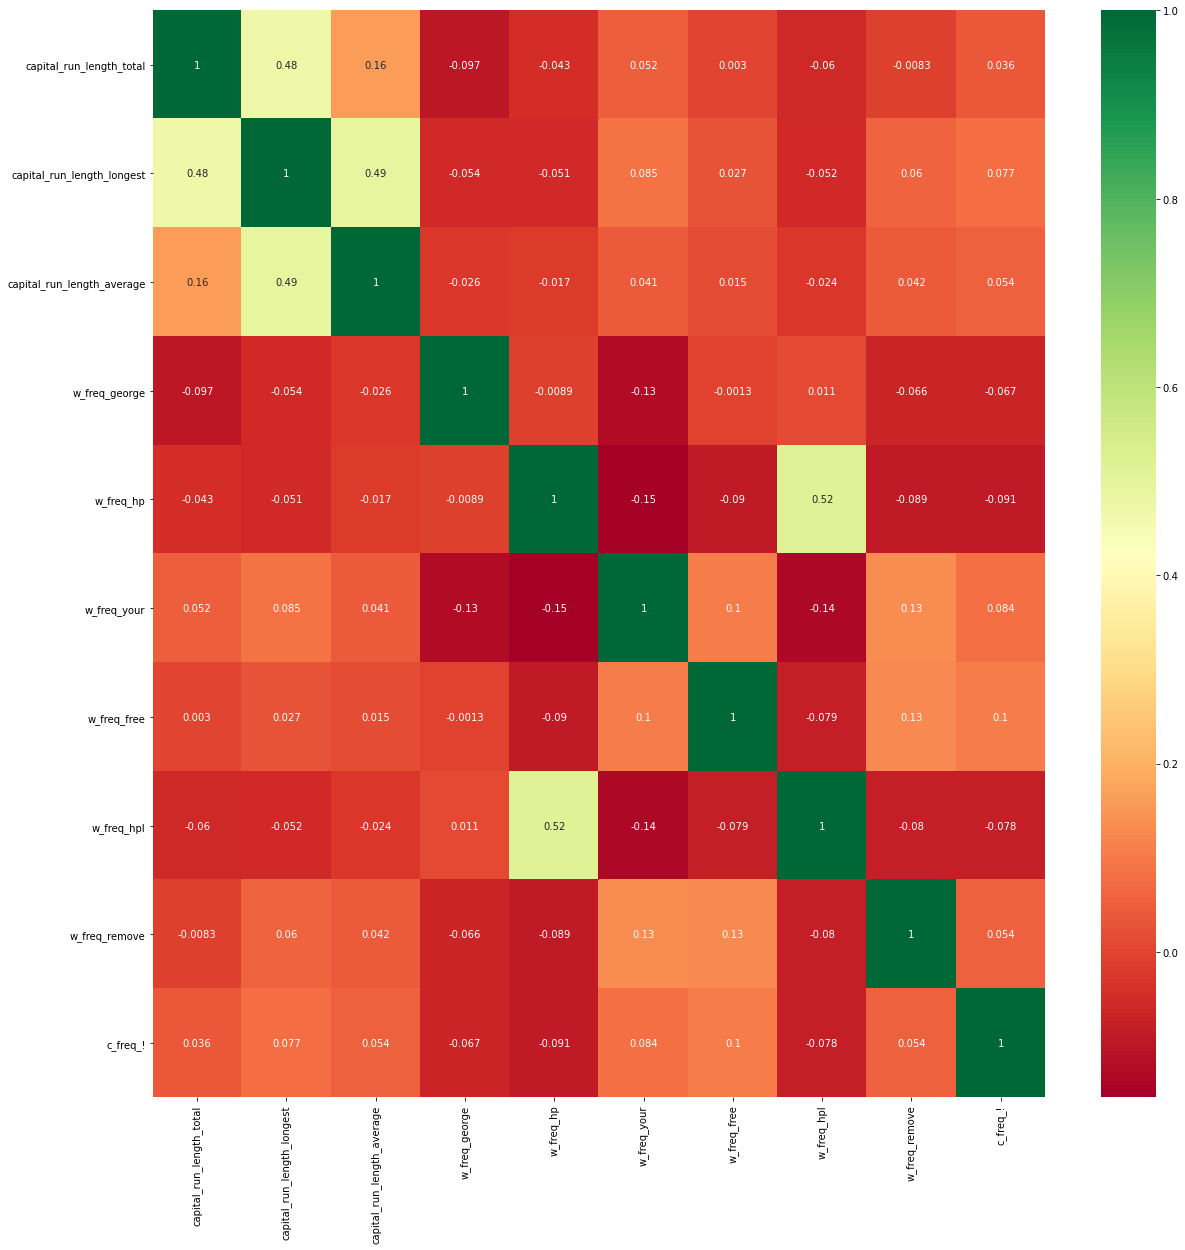

In [10]:
#get correlations of each features in dataset
corrmat = df[["capital_run_length_total", "capital_run_length_longest", "capital_run_length_average",
             "w_freq_george", "w_freq_hp", "w_freq_your", "w_freq_free", "w_freq_hpl", "w_freq_remove", "c_freq_!"]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see here thant for the 10 more important features of the dataset, the is no big correlation between them. 

# Standardize data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) # il ne faut fiter que les data d'entrainnement 
x = scaler.transform(x)
x_train = scaler.transform(x_train)

In [25]:
scaler2 = StandardScaler()
scaler2.fit(x2)
x2 = scaler2.transform(x2)

# Model 1 : Gaussian Naive Bayes

In [26]:
model1 = GaussianNB()
score1 = cross_val_score(model1, x, y, cv = 5)
print(score1)
print(np.mean(score1))

[0.85124864 0.86630435 0.85434783 0.84347826 0.69565217]
0.8222062502950479


In [27]:
# By taking only the best features
score_01 = cross_val_score(model1, x2, y, cv = 5)
print(score_01)
print(np.mean(score_01))

[0.85124864 0.87391304 0.80434783 0.84021739 0.70434783]
0.8148149459472218


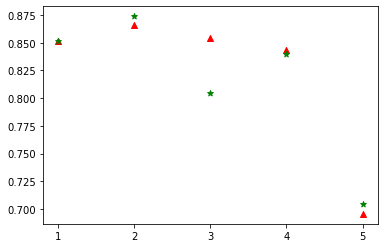

In [28]:
plt.scatter(['1','2','3','4','5'], score1, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_01, marker = '*', c = 'g', label = "Only best features")
plt.show()

# Model 2 : Benouilli Naive Bayes

In [29]:
model2 = BernoulliNB()
score2 = cross_val_score(model2, x, y, cv = 5)
print(score2)
print(np.mean(score2))

[0.91313789 0.91195652 0.91521739 0.93043478 0.81847826]
0.8978449700231318


In [30]:
# By taking only the best features
score_02 = cross_val_score(model2, x2, y, cv = 5)
print(score_02)
print(np.mean(score_02))

[0.91422367 0.91304348 0.92717391 0.93804348 0.83478261]
0.9054534296369731


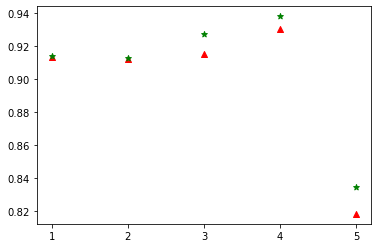

In [31]:
plt.scatter(['1','2','3','4','5'], score2, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_02, marker = '*', c = 'g', label = "Only best features")
plt.show()

# Model 3 : DecisionTreeClassifier

In [32]:
model3 = DecisionTreeClassifier(max_depth = 10, criterion = 'gini')
score3 = cross_val_score(model3, x, y,cv = 5)
print(score3)
print(np.mean(score3))

[0.91422367 0.92173913 0.93586957 0.93586957 0.80652174]
0.9028447339847991


In [33]:
# By taking only the best features 
score_03 = cross_val_score(model3, x2, y,cv = 5)
print(score_03)
print(np.mean(score_03))

[0.91639522 0.91413043 0.9326087  0.93152174 0.79347826]
0.897626870603786


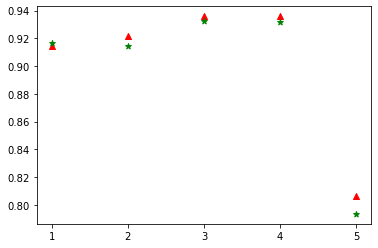

In [34]:
plt.scatter(['1','2','3','4','5'], score3, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_03, marker = '*', c = 'g', label = "Only best features")
plt.show()

In [35]:
model3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
parameters = {'max_depth' : [10, 11, 9],
             'criterion' : ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9114906832298135 DecisionTreeClassifier(criterion='entropy', max_depth=11)


# Model 4 : Support Vector Machine Algorithm

In [37]:
model4 = svm.SVC()
score4 = cross_val_score(model4, x, y,cv = 5)
print(score4)
print(np.mean(score4))

[0.93268187 0.93369565 0.95       0.94891304 0.85      ]
0.9230581126374922


In [38]:
# By taking only the best features 
score_04 = cross_val_score(model4, x2, y,cv = 5)
print(score_04)
print(np.mean(score_04))

[0.93051031 0.93586957 0.94673913 0.94673913 0.85326087]
0.922623802105462


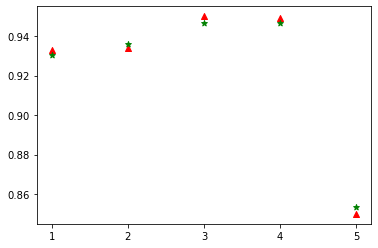

In [39]:
plt.scatter(['1','2','3','4','5'], score4, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_04, marker = '*', c = 'g', label = "Only best features")
plt.show()

# Model 5 : KNN

In [40]:
model5 = KNeighborsClassifier(n_neighbors = 3)
score5 = cross_val_score(model5, x, y,cv = 5)
print(score5)
print(np.mean(score5))

[0.88490771 0.90108696 0.92282609 0.92173913 0.77282609]
0.8806771939763017


In [41]:
# By taking only the best features 
score_05 = cross_val_score(model5, x2, y,cv = 5)
print(score_05)
print(np.mean(score_05))

[0.88273616 0.90543478 0.91413043 0.91630435 0.80543478]
0.8848081008355756


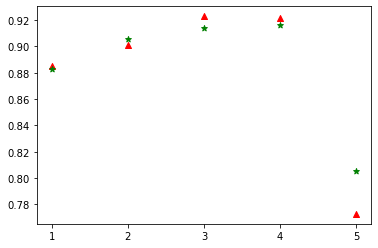

In [32]:
plt.scatter(['1','2','3','4','5'], score5, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_05, marker = '*', c = 'g', label = "Only best features")
plt.show()

In [42]:
def acc(k):
    model5 = KNeighborsClassifier(n_neighbors = k)
    return np.mean(cross_val_score(model5, x, y,cv = 5))
vect = [acc(i) for i in range(1,100)]

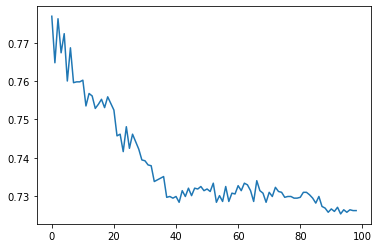

In [117]:
plt.plot(vect)
plt.show()

# Model6 : Multi-layer perceptron

In [43]:
model6 = MLPClassifier(activation = 'logistic', max_iter = 200)
score6 = cross_val_score(model6, x, y,cv = 5)
print(score6)
print(np.mean(score6))

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.93485342 0.93804348 0.95       0.95326087 0.83043478]
0.9213185101260445


C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# By taking only the best features 
score_06 = cross_val_score(model6, x2, y,cv = 5)
print(score_06)
print(np.mean(score_06))

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.93268187 0.93913043 0.95       0.94782609 0.84021739]
0.9219711561157531


C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


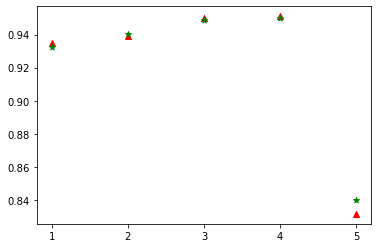

In [35]:
plt.scatter(['1','2','3','4','5'], score6, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_06, marker = '*', c = 'g', label = "Only best features")
plt.show()

In [121]:
model6.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# Model 7 : Gaussian Process Classifier

In [45]:
model7 = GaussianProcessClassifier()
score7 = cross_val_score(model7, x, y,cv = 5)
print(score7)
print(np.mean(score7))

[0.90336591 0.90434783 0.92826087 0.93586957 0.81630435]
0.8976297030637775


In [46]:
# By taking only the best features 
score_07 = cross_val_score(model7, x2, y,cv = 5)
print(score_07)
print(np.mean(score_07))

[0.90988056 0.91521739 0.93369565 0.9326087  0.82282609]
0.9028456781381295


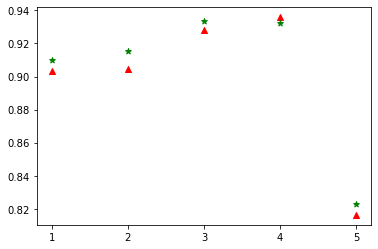

In [38]:
plt.scatter(['1','2','3','4','5'], score7, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_07, marker = '*', c = 'g', label = "Only best features")
plt.show()

# Model 8 : Random Forest Classifier

In [47]:
model8 = RandomForestClassifier()
score8 = cross_val_score(model8, x, y,cv = 5)
print(score8)
print(np.mean(score8))

[0.94571118 0.94347826 0.95108696 0.96956522 0.8326087 ]
0.9284900627861965


In [48]:
# By taking only the best features 
score_08 = cross_val_score(model8, x2, y,cv = 5)
print(score_08)
print(np.mean(score_08))

[0.94896851 0.94456522 0.95434783 0.96413043 0.825     ]
0.9274023981494596


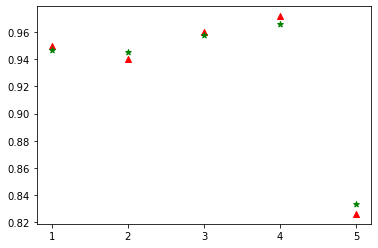

In [43]:
plt.scatter(['1','2','3','4','5'], score8, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_08, marker = '*', c = 'g', label = "Only best features")
plt.show()

# Model 9 : Ada Boost Classifier

In [49]:
model9 = AdaBoostClassifier()
score9 = cross_val_score(model9, x, y,cv = 5)
print(score9)
print(np.mean(score9))

[0.94136808 0.94673913 0.95543478 0.96630435 0.84021739]
0.9300127460699616


In [50]:
# By taking only the best features 
score_09 = cross_val_score(model9, x2, y,cv = 5)
print(score_09)
print(np.mean(score_09))

[0.93702497 0.94565217 0.95869565 0.95652174 0.82934783]
0.9254484728319878


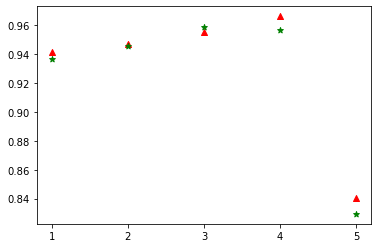

In [46]:
plt.scatter(['1','2','3','4','5'], score9, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_09, marker = '*', c = 'g', label = "Only best features")
plt.show()

# Model 10 : Quadratic Discriminant analysis

In [51]:
model10 = QuadraticDiscriminantAnalysis()
score10 = cross_val_score(model10, x, y,cv = 5)
print(score10)
print(np.mean(score10))

[0.86536374 0.87608696 0.85652174 0.8326087  0.71521739]
0.8291597035358542


C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [52]:
# By taking only the best features 
score_10 = cross_val_score(model10, x2, y,cv = 5)
print(score_10)
print(np.mean(score_10))

[0.86536374 0.87391304 0.81304348 0.82173913 0.71956522]
0.8187249209271584


C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


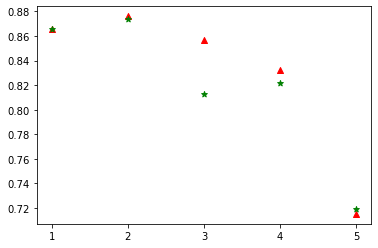

In [49]:
plt.scatter(['1','2','3','4','5'], score10, marker = '^', c='r', label = "With all features")
plt.scatter(['1','2','3','4','5'], score_10, marker = '*', c = 'g', label = "Only best features")
plt.show()

## Deep Learning 

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import * 
from keras.layers import * 

In [14]:
def create_binary_model_bis():
    model = Sequential([Dense(64, input_dim = 57, activation = 'relu'),
                        Dense(1, activation = 'sigmoid')])
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [10]:
from sklearn.preprocessing import StandardScaler
def scale(data, scaler = StandardScaler()):
    scaler.fit(data)
    return scaler.transform(data)

In [11]:
x =  scale(np.array(df.drop('Is_Spam', 1)))
y = np.transpose(np.array(df['Is_Spam']))

In [12]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [13]:
estimator = KerasClassifier(build_fn = create_binary_model_bis, epochs = 25, batch_size = 10, verbose = 0)
kfold = RepeatedKFold(n_splits = 20, n_repeats = 1)
results = cross_val_score(estimator, x, y, cv = kfold, n_jobs = 1)
print(results)
results.mean()

<ipython-input-13-dd0a61ff3705>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(build_fn = create_binary_model_bis, epochs = 25, batch_size = 10, verbose = 0)


[0.969697   0.9217391  0.96086955 0.93478262 0.94782609 0.94347829
 0.94347829 0.96086955 0.93478262 0.9217391  0.96521741 0.95217389
 0.93913043 0.94347829 0.93913043 0.95217389 0.96086955 0.96086955
 0.95652175 0.95217389]


0.9480500638484954

### Now let's plot and compare our different models 

In [53]:
models = ['Model1','Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7', 'Model8', 'Model9', 'Model10','DeepLearningModel']
scores = [np.mean(score1), np.mean(score2),np.mean(score3), np.mean(score4), np.mean(score5), np.mean(score6), np.mean(score7),
          np.mean(score8), np.mean(score9), np.mean(score10),results.mean()]

In [41]:
grid_model = pd.DataFrame({"Model1" : score1, "Model2" : score2, "Model3" : score3, "Model4" : score4, "Model5" : score5,
                          "Model6" : score6, "Model7" : score7, "Model8" : score8, "Model9" : score9, "Model10" : score10})
grid_model

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10
0,0.851249,0.913138,0.913138,0.932682,0.884908,0.934853,0.903366,0.941368,0.941368,0.865364
1,0.866304,0.911957,0.916304,0.933696,0.901087,0.943478,0.904348,0.941304,0.946739,0.876087
2,0.854348,0.915217,0.938043,0.950000,0.922826,0.950000,0.928261,0.958696,0.955435,0.856522
3,0.843478,0.930435,0.935870,0.948913,0.921739,0.953261,0.935870,0.970652,0.966304,0.832609
4,0.695652,0.818478,0.801087,0.850000,0.772826,0.831522,0.816304,0.829348,0.840217,0.715217


In [54]:
grid2 = pd.DataFrame({"Model1" : [np.mean(score1)], "Model2" : [np.mean(score2)], "Model3" : [np.mean(score3)], 
                      "Model4" : [np.mean(score4)], "Model5" : [np.mean(score5)], "Model6" : [np.mean(score6)], 
                      "Model7" : [np.mean(score7)], "Model8" : [np.mean(score8)], "Model9" : [np.mean(score9)], 
                      "Model10" : [np.mean(score10)], "DeepLearningModel" : [results.mean()]})

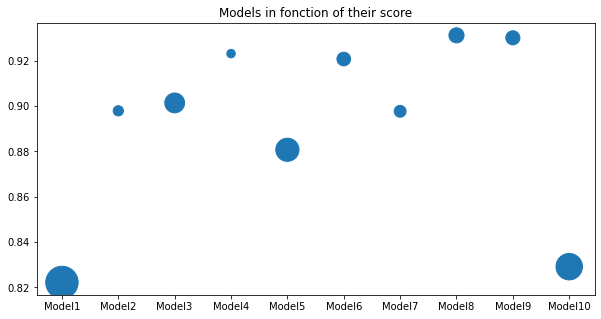

In [161]:
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
axes.scatter(grid_model.columns, np.mean(grid_model), s = (np.std(grid_model)**5)*1000000000)
plt.title('Models in fonction of their score')
plt.show()

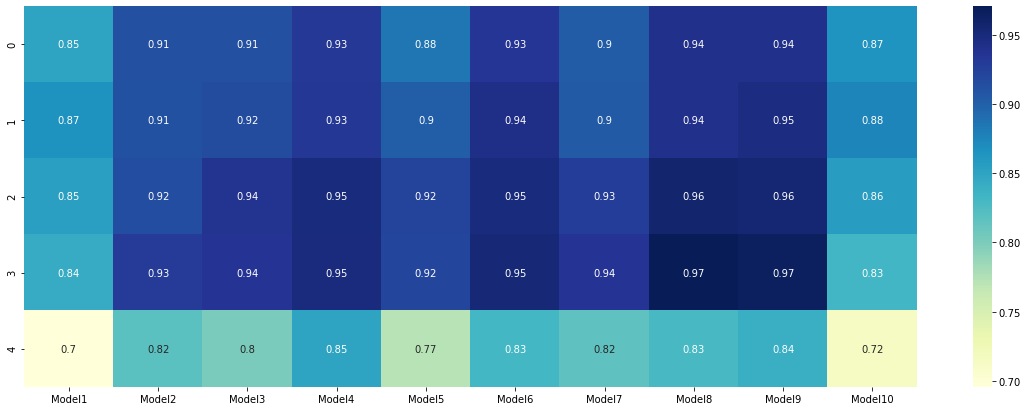

In [50]:
plt.figure(figsize=(20,7))
sns.heatmap(grid_model, annot=True, cmap="YlGnBu")
plt.show()

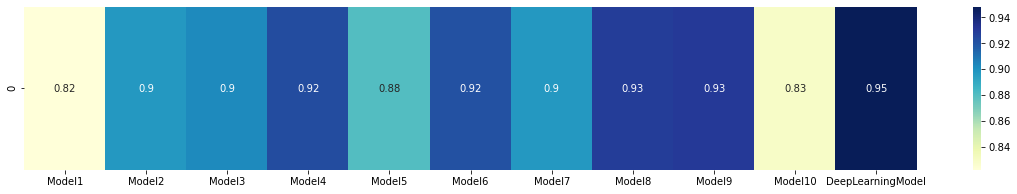

In [55]:
plt.figure(figsize=(20,3))
sns.heatmap(grid2, annot=True, cmap="YlGnBu")
plt.show()